In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
btc = pd.read_csv('datasets/btc.csv')

In [4]:
X = btc.columns

In [5]:
len(X)

144

In [6]:
CorrMatrix = btc.corr()

In [7]:
CorrMatrix

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
AdrActCnt,1.000000,-0.295957,0.959652,0.932884,0.108487,0.934049,0.945186,-0.154716,0.688873,0.937239,...,0.969170,0.415725,0.620344,-0.149944,0.471445,-0.093965,0.816682,-0.101739,-0.504837,-0.255180
AdrBal1in100KCnt,-0.295957,1.000000,-0.311911,-0.254478,-0.331607,-0.398082,-0.275746,-0.163269,-0.459963,-0.252451,...,-0.317946,-0.382872,-0.059261,0.196454,-0.053100,0.098166,-0.106880,-0.328383,-0.649076,0.107336
AdrBal1in100MCnt,0.959652,-0.311911,1.000000,0.978567,0.110501,0.964173,0.991210,-0.160749,0.705385,0.973496,...,0.936033,0.342639,0.596460,-0.158842,0.467595,-0.100729,0.784030,-0.133679,-0.485315,-0.270235
AdrBal1in10BCnt,0.932884,-0.254478,0.978567,1.000000,0.108065,0.895520,0.996777,-0.190684,0.583663,0.997028,...,0.891673,0.260677,0.683952,-0.128747,0.530808,-0.080340,0.810682,-0.218496,-0.405083,-0.215870
AdrBal1in10KCnt,0.108487,-0.331607,0.110501,0.108065,1.000000,0.109859,0.108865,-0.061891,0.036024,0.107419,...,0.110097,0.072873,0.309664,-0.113349,0.229333,-0.057074,0.357296,0.058248,-0.421704,-0.332325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TxTfrValMedNtv,-0.093965,0.098166,-0.100729,-0.080340,-0.057074,-0.138490,-0.087445,-0.144013,-0.239874,-0.079789,...,-0.101216,-0.120343,-0.067188,0.934852,-0.058092,1.000000,-0.101490,-0.099275,0.518596,0.123766
TxTfrValMedUSD,0.816682,-0.106880,0.784030,0.810682,0.357296,0.710752,0.803434,-0.503479,0.451780,0.820305,...,0.745514,0.126008,0.647192,-0.211772,0.501146,-0.101490,1.000000,-0.326634,-0.202220,-0.050680
VelCur1yr,-0.101739,-0.328383,-0.133679,-0.218496,0.058248,0.015809,-0.191981,0.237018,0.354171,-0.204888,...,-0.056968,0.484088,-0.284704,-0.133374,-0.204912,-0.099275,-0.326634,1.000000,0.039563,-0.066300
VtyDayRet180d,-0.504837,-0.649076,-0.485315,-0.405083,-0.421704,-0.584099,-0.432093,0.600602,-0.703672,-0.404610,...,-0.562346,-0.288359,-0.200798,0.316258,-0.149444,0.518596,-0.202220,0.039563,1.000000,0.580388


In [8]:
CorrMatrix['PriceUSD']

AdrActCnt           0.678202
AdrBal1in100KCnt   -0.068116
AdrBal1in100MCnt    0.675125
AdrBal1in10BCnt     0.769321
AdrBal1in10KCnt     0.378985
                      ...   
TxTfrValMedNtv     -0.076248
TxTfrValMedUSD      0.723620
VelCur1yr          -0.347565
VtyDayRet180d      -0.215754
VtyDayRet30d       -0.100315
Name: PriceUSD, Length: 143, dtype: float64

In [9]:
CorrMatrix = CorrMatrix[abs(CorrMatrix['PriceUSD'])>= 0.5]

In [10]:
CorrMatrix['AdrBal1in100KCnt']

AdrActCnt             -0.295957
AdrBal1in100MCnt      -0.311911
AdrBal1in10BCnt       -0.254478
AdrBal1in10MCnt       -0.398082
AdrBal1in1BCnt        -0.275746
                         ...   
SplyMiner1HopAllUSD   -0.069581
TxTfrCnt              -0.317946
TxTfrValAdjUSD        -0.059261
TxTfrValMeanUSD       -0.053100
TxTfrValMedUSD        -0.106880
Name: AdrBal1in100KCnt, Length: 77, dtype: float64

In [11]:
for el in CorrMatrix.columns:
    if el not in CorrMatrix.index:
        del CorrMatrix[el]

In [12]:
CorrMatrix

,AdrActCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv1Cnt,...,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyMiner0HopAllUSD,SplyMiner1HopAllNtv,SplyMiner1HopAllUSD,TxTfrCnt,TxTfrValAdjUSD,TxTfrValMeanUSD,TxTfrValMedUSD
AdrActCnt,1.000000,0.959652,0.932884,0.934049,0.945186,0.937239,0.928103,0.944100,0.953823,0.954784,...,0.900213,0.853412,0.844231,0.679410,-0.022894,0.686367,0.969170,0.620344,0.471445,0.816682
AdrBal1in100MCnt,0.959652,1.000000,0.978567,0.964173,0.991210,0.973496,0.973594,0.988802,0.997059,0.990053,...,0.927219,0.883889,0.876528,0.676142,-0.009558,0.681569,0.936033,0.596460,0.467595,0.784030
AdrBal1in10BCnt,0.932884,0.978567,1.000000,0.895520,0.996777,0.997028,0.999592,0.998044,0.991216,0.944343,...,0.850554,0.801699,0.794089,0.770129,-0.077600,0.774616,0.891673,0.683952,0.530808,0.810682
AdrBal1in10MCnt,0.934049,0.964173,0.895520,1.000000,0.924100,0.890414,0.886737,0.917531,0.943153,0.991264,...,0.987330,0.964654,0.959320,0.556181,0.149604,0.562381,0.935112,0.486358,0.386907,0.710752
AdrBal1in1BCnt,0.945186,0.991210,0.996777,0.924100,1.000000,0.992123,0.994362,0.999710,0.998192,0.964921,...,0.880494,0.832960,0.825447,0.730715,-0.056711,0.735435,0.911087,0.648442,0.505271,0.803434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SplyMiner1HopAllUSD,0.686367,0.681569,0.774616,0.562381,0.735435,0.799257,0.789274,0.743690,0.717140,0.631329,...,0.562251,0.549392,0.558272,0.999066,-0.588502,1.000000,0.609830,0.868789,0.649163,0.733426
TxTfrCnt,0.969170,0.936033,0.891673,0.935112,0.911087,0.892654,0.885235,0.908139,0.924284,0.944372,...,0.910866,0.870070,0.860127,0.603598,0.012713,0.609830,1.000000,0.558256,0.420760,0.745514
TxTfrValAdjUSD,0.620344,0.596460,0.683952,0.486358,0.648442,0.714152,0.698508,0.656610,0.630066,0.549050,...,0.491936,0.479702,0.488847,0.877683,-0.550310,0.868789,0.558256,1.000000,0.767116,0.647192
TxTfrValMeanUSD,0.471445,0.467595,0.530808,0.386907,0.505271,0.557788,0.542399,0.511016,0.491325,0.432518,...,0.393160,0.382940,0.390821,0.657858,-0.442379,0.649163,0.420760,0.767116,1.000000,0.501146


In [13]:
CorrMatrix['PriceUSD']

AdrActCnt              0.678202
AdrBal1in100MCnt       0.675125
AdrBal1in10BCnt        0.769321
AdrBal1in10MCnt        0.555003
AdrBal1in1BCnt         0.729836
                         ...   
SplyMiner1HopAllUSD    0.999164
TxTfrCnt               0.602541
TxTfrValAdjUSD         0.877199
TxTfrValMeanUSD        0.657217
TxTfrValMedUSD         0.723620
Name: PriceUSD, Length: 77, dtype: float64

In [14]:
correlated_features = dict()
for feat1 in CorrMatrix.columns:
    if feat1 != "PriceUSD": 
        correlated_features[feat1] = []
        for feat2 in CorrMatrix.columns:
            if abs(CorrMatrix[feat1][feat2]) > 0.9 and feat1 != feat2:
                if feat1 != "PriceUSD" and feat2 != "PriceUSD":
                    correlated_features[feat1].append(feat2)

In [15]:
highlyCorrelated = list()
corSet = set()
for column in correlated_features.keys():
    maxCor = 0
    bestCor = None
    for el in correlated_features[column] + [column]:
        if abs(CorrMatrix['PriceUSD'][el]) > maxCor:
            maxCor = abs(CorrMatrix['PriceUSD'][el])
            bestCor = el
            
    highlyCorrelated.append(bestCor)
    corSet.add(bestCor)

In [16]:
len(list(corSet))
explanatory = list(corSet)

In [17]:
for el in list(corSet):
    print(el + " " + str(CorrMatrix['PriceUSD'][el]))

TxTfrValMeanUSD 0.6572171551462382
TxTfrValAdjUSD 0.8771991625686137
TxTfrValMedUSD 0.7236200709974796
AdrBalNtv0.01Cnt 0.7381903889819359
SplyAdrBalUSD100K 0.6487983019587369
AssetEODCompletionTime 0.7089935032350656
SplyMiner0HopAllUSD 0.9999860941622307
AdrBalUSD10KCnt 0.9821744354688466
AdrBalCnt 0.7950820297103433
SplyAdrBalUSD10K 0.549062470115893
AdrBal1in100MCnt 0.675125141724985
SplyMiner1HopAllNtv -0.5902008967764314
FeeMeanUSD 0.5175432443311527
FlowInExUSD 0.8442750392180502
SplyAdrBalUSD1M 0.7867901509504597
AdrBalUSD1KCnt 0.9566186788363377
AdrBalUSD100Cnt 0.9355593452810728
AdrBalUSD10Cnt 0.895705238265752
SplyAdrBalUSD10M 0.8379066818868521
AdrBalUSD10MCnt 0.9973885100010248


Text(0.5, 0, 'AdrBalUSD10MCnt')

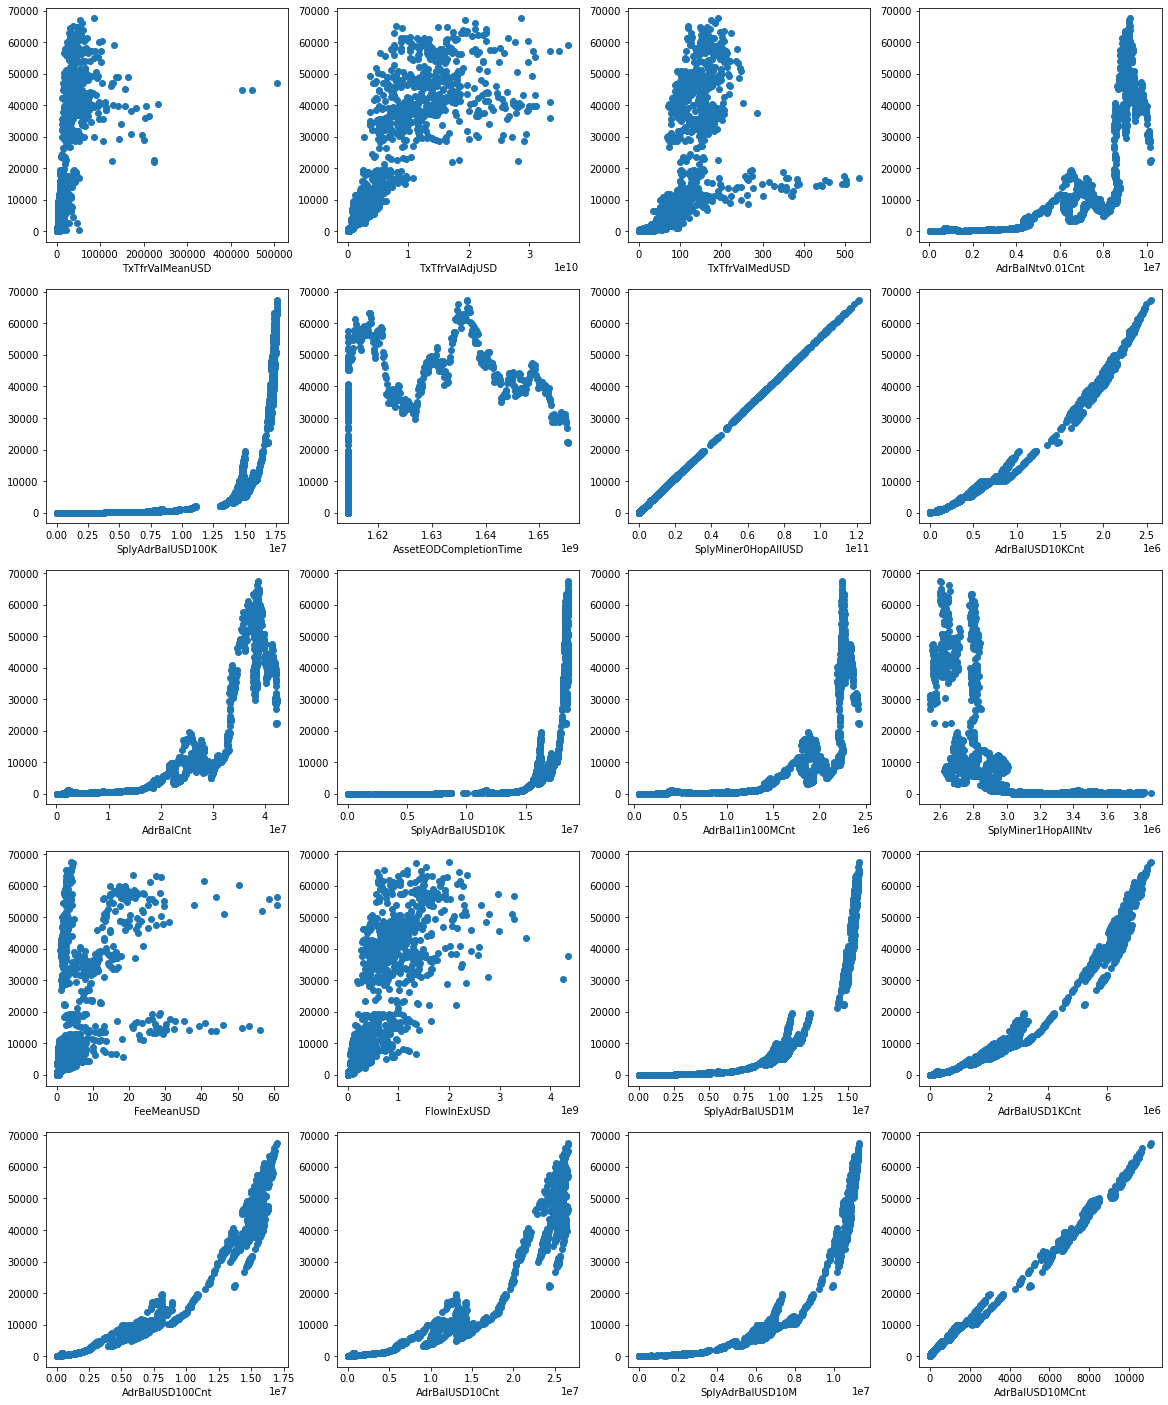

In [18]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), 
      (ax13, ax14, ax15, ax16), (ax17, ax18, ax19, ax20)) = plt.subplots(ncols=4, nrows=5,figsize=(20, 25))
# for big image wirth 8 features: figsize=(20, 25) #8

responce = btc['PriceUSD'].values

ax1.scatter(btc[explanatory[0]].values, responce)
ax1.set_xlabel(explanatory[0])
ax2.scatter(btc[explanatory[1]].values, responce)
ax2.set_xlabel(explanatory[1])

ax3.scatter(btc[explanatory[2]].values, responce)
ax3.set_xlabel(explanatory[2])
ax4.scatter(btc[explanatory[3]].values, responce)
ax4.set_xlabel(explanatory[3])

ax5.scatter(btc[explanatory[4]].values, responce)
ax5.set_xlabel(explanatory[4])
ax6.scatter(btc[explanatory[5]].values, responce)
ax6.set_xlabel(explanatory[5])

ax7.scatter(btc[explanatory[6]].values, responce)
ax7.set_xlabel(explanatory[6])
ax8.scatter(btc[explanatory[7]].values, responce)
ax8.set_xlabel(explanatory[7])

ax9.scatter(btc[explanatory[8]].values, responce)
ax9.set_xlabel(explanatory[8])
ax10.scatter(btc[explanatory[9]].values, responce)
ax10.set_xlabel(explanatory[9])

ax11.scatter(btc[explanatory[10]].values, responce)
ax11.set_xlabel(explanatory[10])
ax12.scatter(btc[explanatory[11]].values, responce)
ax12.set_xlabel(explanatory[11])

ax13.scatter(btc[explanatory[12]].values, responce)
ax13.set_xlabel(explanatory[12])
ax14.scatter(btc[explanatory[13]].values, responce)
ax14.set_xlabel(explanatory[13])

ax15.scatter(btc[explanatory[14]].values, responce)
ax15.set_xlabel(explanatory[14])
ax16.scatter(btc[explanatory[15]].values, responce)
ax16.set_xlabel(explanatory[15])

ax17.scatter(btc[explanatory[16]].values, responce)
ax17.set_xlabel(explanatory[16])
ax18.scatter(btc[explanatory[17]].values, responce)
ax18.set_xlabel(explanatory[17])

ax19.scatter(btc[explanatory[18]].values, responce)
ax19.set_xlabel(explanatory[18])
ax20.scatter(btc[explanatory[19]].values, responce)
ax20.set_xlabel(explanatory[19])

#ax19.scatter(btc[explanatory[18]].values, responce)
#ax19.set_xlabel(explanatory[18])
#ax20.scatter(btc[explanatory[19]].values, responce)
#ax20.set_xlabel(explanatory[19])

In [19]:
#"""""""""""""""""""""""""""""""""""""""""""""""

In [20]:
btc = btc[btc['PriceUSD'].isna() == False]

In [21]:
btc['PriceUSD'].isna().sum()

0

In [22]:
btc.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
555,2010-07-18,860.0,49287.0,52093.0,52190.0,199.0,51245.0,52190.0,54.0,51064.0,...,396.0,17180.55,1474.778412,48.783737,4.187596,1.850,0.158804,1.820565,NaN,NaN
556,2010-07-19,929.0,49297.0,52208.0,52311.0,207.0,51276.0,52311.0,54.0,51085.0,...,512.0,40243.73,3251.693384,86.951152,7.025653,2.625,0.212100,1.828863,NaN,NaN
557,2010-07-20,936.0,49367.0,52344.0,52456.0,213.0,51353.0,52456.0,54.0,51157.0,...,738.0,16063.23,1200.497201,42.528835,3.178423,1.375,0.102762,1.831412,NaN,NaN
558,2010-07-21,784.0,49382.0,52397.0,52521.0,220.0,51380.0,52521.0,54.0,51179.0,...,377.0,20834.15,1649.915979,71.822334,5.687816,18.500,1.465068,1.833749,NaN,NaN
559,2010-07-22,594.0,49504.0,52577.0,52715.0,222.0,51508.0,52715.0,57.0,51304.0,...,344.0,33049.03,1932.368865,112.714622,6.590397,1.010,0.059054,1.840245,NaN,NaN


In [23]:
btc[['time', 'PriceUSD']].head()

,time,PriceUSD
555,2010-07-18,0.085840
556,2010-07-19,0.080800
557,2010-07-20,0.074736
558,2010-07-21,0.079193
559,2010-07-22,0.058470


In [24]:
# Additing price as one of the explanatory variables for the future price
btc["LastDayPrice"] = btc['PriceUSD']

In [25]:
btc['PriceUSD'] = btc.PriceUSD.shift(-1) # shift price for 1 day
btc = btc[:-1] # remove the last row

In [26]:
btc[['time', 'PriceUSD']].head()

,time,PriceUSD
555,2010-07-18,0.080800
556,2010-07-19,0.074736
557,2010-07-20,0.079193
558,2010-07-21,0.058470
559,2010-07-22,0.060593


# Preprocessing part

#### Response variable transformation

In [27]:
# import seaborn as sns
# from scipy import stats

# sns.distplot(btc['PriceUSD'] , fit=stats.norm);

# # Get the fitted parameters used by the function
# (mu, sigma) = stats.norm.fit(btc['PriceUSD'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('PriceUSD distribution')

# #Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(btc['PriceUSD'], plot=plt)
# plt.show()

In [28]:
btc['PriceUSD'].isna().sum()

0

In [29]:
# #We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# btc['PriceUSD'] = np.log((btc['PriceUSD']))

# #Check the new distribution 
# sns.distplot(btc['PriceUSD'], fit=stats.norm);

# # Get the fitted parameters used by the function
# (mu, sigma) = stats.norm.fit(btc['PriceUSD'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

# # #Get also the QQ-plot
# # fig = plt.figure()
# # res = stats.probplot(btc['PriceUSD'], plot=plt)
# # plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
X = btc[list(corSet) + ['LastDayPrice']]
y = btc.PriceUSD

In [32]:
X.isna().sum().sum()

0

In [33]:
y.isna()

555     False
556     False
557     False
558     False
559     False
        ...  
4900    False
4901    False
4902    False
4903    False
4904    False
Name: PriceUSD, Length: 4350, dtype: bool

In [34]:
y

555         0.080800
556         0.074736
557         0.079193
558         0.058470
559         0.060593
            ...     
4900    28360.789923
4901    26830.283946
4902    22316.257040
4903    22072.866309
4904    22520.791009
Name: PriceUSD, Length: 4350, dtype: float64

In [35]:
X.head()

,TxTfrValMeanUSD,TxTfrValAdjUSD,TxTfrValMedUSD,AdrBalNtv0.01Cnt,SplyAdrBalUSD100K,AssetEODCompletionTime,SplyMiner0HopAllUSD,AdrBalUSD10KCnt,AdrBalCnt,SplyAdrBalUSD10K,...,SplyMiner1HopAllNtv,FeeMeanUSD,FlowInExUSD,SplyAdrBalUSD1M,AdrBalUSD1KCnt,AdrBalUSD100Cnt,AdrBalUSD10Cnt,SplyAdrBalUSD10M,AdrBalUSD10MCnt,LastDayPrice
555,4.187596,1474.778412,0.158804,52190.0,0.0,1.614335e+09,204478.223612,0.0,52190.0,0.0,...,3119011.46,0.000273,0.0,0.0,18.0,102.0,382.0,0.0,0.0,0.085840
556,7.025653,3251.693384,0.212100,52311.0,0.0,1.614335e+09,192335.135472,0.0,52311.0,0.0,...,3124984.49,0.000012,0.0,0.0,19.0,103.0,400.0,0.0,0.0,0.080800
557,3.178423,1200.497201,0.102762,52456.0,0.0,1.614335e+09,178090.401130,0.0,52456.0,0.0,...,3132645.14,0.000000,0.0,0.0,17.0,101.0,412.0,0.0,0.0,0.074736
558,5.687816,1649.915979,1.465068,52521.0,0.0,1.614335e+09,188679.781277,0.0,52521.0,0.0,...,3139232.45,0.000000,0.0,0.0,18.0,104.0,430.0,0.0,0.0,0.079193
559,6.590397,1932.368865,0.059054,52715.0,0.0,1.614335e+09,139621.996594,0.0,52715.0,0.0,...,3143642.45,0.000000,0.0,0.0,14.0,90.0,356.0,0.0,0.0,0.058470


In [36]:
y.head()

555    0.080800
556    0.074736
557    0.079193
558    0.058470
559    0.060593
Name: PriceUSD, dtype: float64

### Normalization

In [37]:
# Min Max Scaler

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [39]:
X

array([[6.76590610e-06, 2.76990962e-08, 2.96910988e-04, ...,
        0.00000000e+00, 0.00000000e+00, 5.22630894e-07],
       [1.23727905e-05, 7.64272504e-08, 3.96556942e-04, ...,
        0.00000000e+00, 0.00000000e+00, 4.48010332e-07],
       [4.77217811e-06, 2.01775112e-08, 1.92130221e-04, ...,
        0.00000000e+00, 0.00000000e+00, 3.58224751e-07],
       ...,
       [6.04080501e-02, 2.44132419e-01, 1.35788107e-01, ...,
        8.98807958e-01, 5.08035392e-01, 3.97239504e-01],
       [2.51474204e-01, 7.72433283e-01, 2.14271541e-01, ...,
        8.78550408e-01, 4.56392199e-01, 3.30406325e-01],
       [4.39511476e-01, 4.74604716e-01, 1.87850849e-01, ...,
        8.76131798e-01, 4.48808234e-01, 3.26802763e-01]])

### Dataset split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.9, shuffle=False) # Train and (validation + test)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle=False) # validation and test

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(3915, 21)
(3915,)
(217, 21)
(217,)
(218, 21)
(218,)


(None, None)

# Predictons

#### Linear regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
reg = LinearRegression().fit(X_train, y_train)

In [44]:
reg.score(X_train, y_train)

0.9977817921753348

In [45]:
reg.coef_

array([ 2.15185243e+03,  2.06286580e+03,  2.69783517e+02, -2.42161792e+03,
       -1.68457681e+03, -2.76708495e+03, -7.02599221e+03,  2.10005412e+03,
        9.21896488e+02,  2.99240666e+02,  1.38628430e+03, -6.20600391e+01,
       -1.28028474e+02, -2.58415451e+03,  2.19352223e+03,  4.27711151e+03,
       -5.62584690e+03,  2.57658784e+03, -1.73405138e+03,  2.59650795e+03,
        6.96273037e+04])

In [46]:
reg.intercept_

61.01160358991865

In [47]:
results_valid = reg.predict(X_valid)

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, results_valid)

3614041.18108821

In [49]:
from sklearn.metrics import r2_score
r2_score(y_valid, results_valid)

0.9638995282295745

In [50]:
y_valid[:10]

4470    56266.834676
4471    57963.344599
4472    58051.762556
4473    59651.558988
4474    59932.930647
4475    59905.936374
4476    63445.638314
4477    62869.495587
4478    63231.162987
4479    61571.110091
Name: PriceUSD, dtype: float64

In [51]:
results_valid[:10]

array([58469.81716157, 56445.41466675, 58386.34119906, 58389.70829272,
       59721.00435859, 60030.94039892, 59955.25344017, 63294.42091912,
       62899.57865692, 63274.74835562])

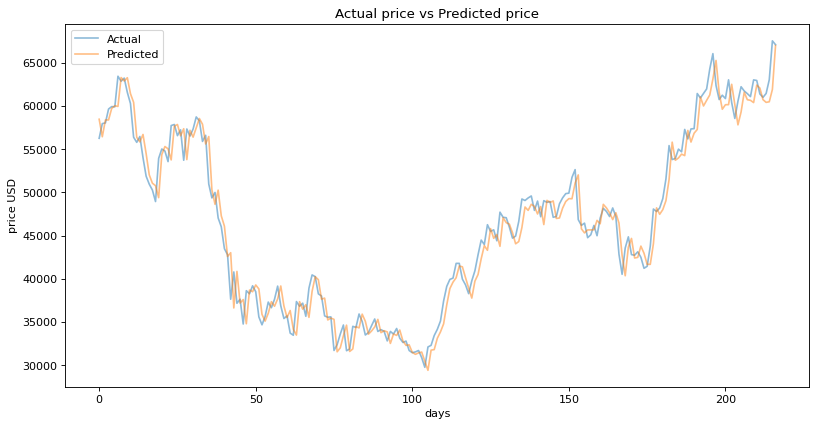

In [52]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid, label = "Predicted", alpha=0.5)
plt.xlabel("days")
plt.ylabel("price USD")
plt.title("Actual price vs Predicted price")
plt.legend()
plt.show()

#### Decision trees

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# randomFor = RandomForestRegressor()
decTree = DecisionTreeRegressor()
decTree.fit(X_train, y_train)
results_valid = decTree.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

16475686.166189458


0.8354252169418223

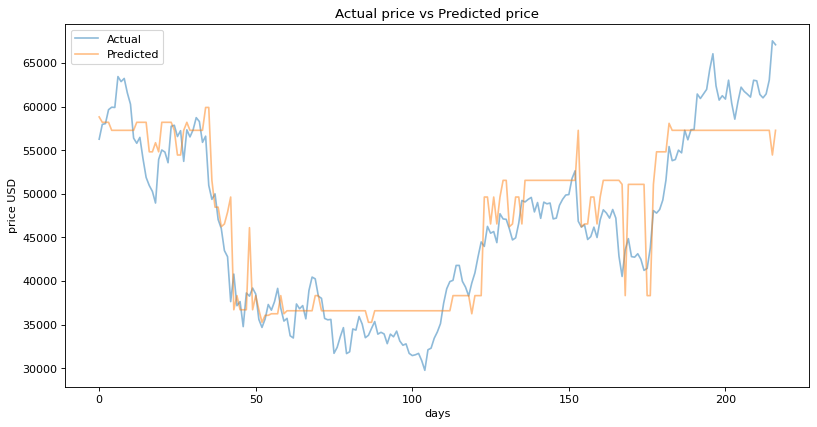

In [54]:
figure(figsize=(12, 6), dpi=80)
plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid, label = "Predicted", alpha=0.5)
plt.xlabel("days")
plt.ylabel("price USD")
plt.title("Actual price vs Predicted price")
plt.legend()
plt.show()

#### Random Forest

In [55]:
randomFor = RandomForestRegressor()
randomFor.fit(X_train, y_train)
results_valid = randomFor.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

46675005.11406238


0.5337657707604444

In [56]:
y_valid.shape[0]

217

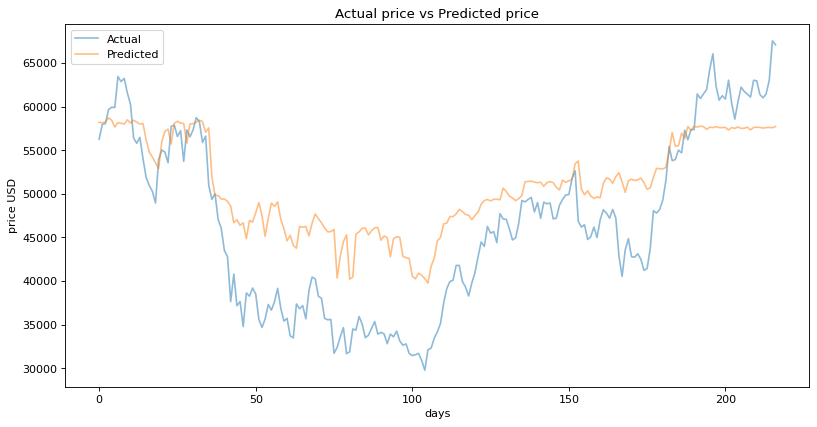

In [57]:
figure(figsize=(12, 6), dpi=80)
plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid , label = "Predicted", alpha=0.5)
plt.xlabel("days")
plt.ylabel("price USD")
plt.title("Actual price vs Predicted price")
plt.legend()
plt.show()

#### Suport vector regressor

In [58]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(X_train, y_train , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_valid)

print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

46675005.11406238


0.5337657707604444

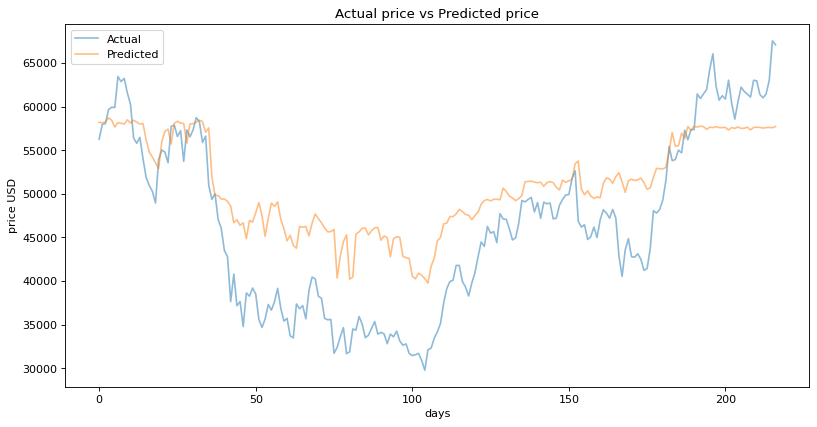

In [59]:
figure(figsize=(12, 6), dpi=80)
plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid, label = "Predicted", alpha=0.5)
plt.xlabel("days")
plt.ylabel("price USD")
plt.title("Actual price vs Predicted price")
plt.legend()
plt.show()

#### Neural networks

In [71]:
import os
for el in os.listdir():
    if el.startswith("model"):
        os.remove(el)

In [61]:
# importing the libraries
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import callbacks
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=512, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
#model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
 
# Compiling the model

optimizer = Adam(learning_rate=0.005)
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11264     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 175,617
Trainable params: 175,617
Non-trainable params: 0
_________________________________________________________________


In [62]:
# https://keras.io/api/callbacks/
my_callbacks = [
    callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=100),
    callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{loss:.2f}.h5'),
    callbacks.TensorBoard(log_dir='./logs'),
]

In [63]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1, callbacks=my_callbacks)

Epoch 1/1000
123/123 [==============================] - 1s 2ms/step - loss: 28462812.0000
Epoch 2/1000
123/123 [==============================] - 0s 3ms/step - loss: 1369886.2500
Epoch 3/1000
123/123 [==============================] - 0s 3ms/step - loss: 537272.7500
Epoch 4/1000
123/123 [==============================] - 1s 4ms/step - loss: 433773.5000
Epoch 5/1000
123/123 [==============================] - 0s 4ms/step - loss: 517461.0625
Epoch 6/1000
123/123 [==============================] - 0s 4ms/step - loss: 472858.6562
Epoch 7/1000
123/123 [==============================] - 0s 4ms/step - loss: 334748.9688
Epoch 8/1000
123/123 [==============================] - 0s 4ms/step - loss: 365333.9688
Epoch 9/1000
123/123 [==============================] - 0s 4ms/step - loss: 340095.0000
Epoch 10/1000
123/123 [==============================] - 1s 4ms/step - loss: 253868.7656
Epoch 11/1000
123/123 [==============================] - 0s 4ms/step - loss: 267191.2812
Epoch 12/1000
123/123 [====

In [64]:
import math
best = None
min_loss = math.inf
for el in os.listdir():
    if el.startswith("model"):
        value = float(el.split("-")[1].split('.')[0] + "." + el.split("-")[1].split('.')[1])
        if value < min_loss:
            min_loss = value
            best = el

In [65]:
from keras import models
best_model = models.clone_model(model)
# best

In [66]:
wights_file = best # choose the best checkpoint 
best_model.load_weights(wights_file) # load it
best_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [67]:
results_valid = best_model.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

4208345.922454583


0.9579630486866749

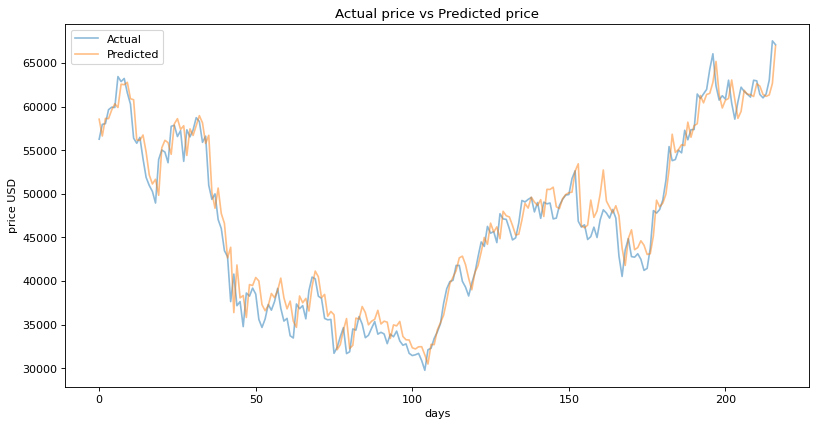

In [68]:
figure(figsize=(12, 6), dpi=80)
plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid, label = "Predicted", alpha=0.5)
plt.xlabel("days")
plt.ylabel("price USD")
plt.title("Actual price vs Predicted price")
plt.legend()
plt.show()

In [69]:
results_valid = model.predict(X_valid)
print(mean_squared_error(y_valid, results_valid))
r2_score(y_valid, results_valid)

3859099.560230834


0.9614516526645039

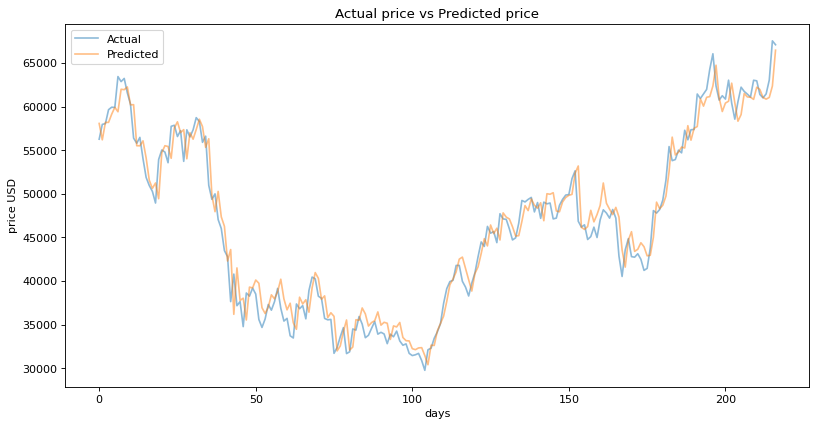

In [70]:
figure(figsize=(12, 6), dpi=80)
plt.plot(y_valid.values, label = "Actual", alpha=0.5)
plt.plot(results_valid, label = "Predicted", alpha=0.5)
plt.xlabel("days")
plt.ylabel("price USD")
plt.title("Actual price vs Predicted price")
plt.legend()
plt.show()

# **SOURCES:**


*   https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
*   https://pythondata.com/forecasting-time-series-autoregression/
* https://otexts.com/fpp2/what-can-be-forecast.html
